# M2C4 Data Representation: Features, Labels and Formats

4.1 Import and Load Dataset

In [ ]:
import pandas as pd

data = """customer_id,region,plan_type,tenure_months,monthly_charges,total_charges,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,days_since_last_recharge,last_call_time,first_recharge_date,churn
C001,North,Basic,12,399,4788,3,1,Yes,1,0.08,No,12,2025-01-18 21:15:42,2024-12-20,No
C002,West,Premium,4,899,3596,1,0,No,2,0.15,Yes,25,2025-01-17 18:22:30,2025-01-02,Yes
C003,South,Standard,22,599,13178,0,2,No,0,0.05,No,40,2025-01-16 20:10:45,2024-11-25,No
C004,East,Basic,8,349,2792,4,3,Yes,4,0.22,No,60,2025-01-15 09:12:15,2024-12-10,Yes
C005,Central,Premium,15,999,14985,2,1,No,3,0.10,Yes,30,2025-01-14 11:45:22,2024-12-30,No
C006,North,Standard,6,549,3294,0,0,Yes,1,0.07,No,5,2025-01-18 06:33:55,2025-01-12,No
C007,West,Basic,3,299,897,5,4,Yes,5,0.25,Yes,75,2025-01-13 08:18:20,2024-11-01,Yes
C008,South,Premium,18,899,16182,1,1,No,1,0.11,No,45,2025-01-19 10:11:59,2024-12-10,No
C009,East,Standard,27,649,17523,0,2,No,0,0.05,No,15,2025-01-17 23:09:31,2025-01-01,No
C010,Central,Basic,11,399,4389,3,1,Yes,2,0.14,No,20,2025-01-18 17:45:50,2024-12-25,Yes
"""

# Write to local file in Colab runtime
with open("telecom_dataset.csv", "w") as f:
    f.write(data)

print("telecom_dataset.csv saved successfully!")

df = pd.read_csv("telecom_dataset.csv", parse_dates=['last_call_time','first_recharge_date'])
df.head()


telecom_dataset.csv saved successfully!


,customer_id,region,plan_type,tenure_months,monthly_charges,total_charges,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,days_since_last_recharge,last_call_time,first_recharge_date,churn
0,C001,North,Basic,12,399,4788,3,1,Yes,1,0.08,No,12,2025-01-18 21:15:42,2024-12-20,No
1,C002,West,Premium,4,899,3596,1,0,No,2,0.15,Yes,25,2025-01-17 18:22:30,2025-01-02,Yes
2,C003,South,Standard,22,599,13178,0,2,No,0,0.05,No,40,2025-01-16 20:10:45,2024-11-25,No
3,C004,East,Basic,8,349,2792,4,3,Yes,4,0.22,No,60,2025-01-15 09:12:15,2024-12-10,Yes
4,C005,Central,Premium,15,999,14985,2,1,No,3,0.10,Yes,30,2025-01-14 11:45:22,2024-12-30,No


4.2 Understanding Features and Labels

In [ ]:
# Features = input columns; Label = output column
features = df.drop(columns=['churn'])
label = df['churn']

print("Feature Columns:")
[print (x) for x in features.columns]
print("\n\nLabel Column:\n",label.name)


Feature Columns:
customer_id
region
plan_type
tenure_months
monthly_charges
total_charges
calls_dropped
support_calls
is_prepaid
complaints_last_30_days
call_drop_ratio
is_ported_out_last_year
days_since_last_recharge
last_call_time
first_recharge_date


Label Column:
 churn


4.3 Identifying Data Types


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               10 non-null     object        
 1   region                    10 non-null     object        
 2   plan_type                 10 non-null     object        
 3   tenure_months             10 non-null     int64         
 4   monthly_charges           10 non-null     int64         
 5   total_charges             10 non-null     int64         
 6   calls_dropped             10 non-null     int64         
 7   support_calls             10 non-null     int64         
 8   is_prepaid                10 non-null     object        
 9   complaints_last_30_days   10 non-null     int64         
 10  call_drop_ratio           10 non-null     float64       
 11  is_ported_out_last_year   10 non-null     object        
 12  days_since_last_recharge 

4.4 Categorical and Numerical Features

In [ ]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

Categorical Features: ['customer_id', 'region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'churn']
Numerical Features: ['tenure_months', 'monthly_charges', 'total_charges', 'calls_dropped', 'support_calls', 'complaints_last_30_days', 'call_drop_ratio', 'days_since_last_recharge', 'last_call_time', 'first_recharge_date']


4.5 Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, MinMaxScaler

# Label Encoding example
le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])
df[['region','region_encoded']].head()



,region,region_encoded
0,North,2
1,West,4
2,South,3
3,East,1
4,Central,0


In [ ]:
# Display original categorical columns
print("Original categorical columns:", df.select_dtypes(include='object').columns.tolist())
print(df[['plan_type']])

# One-hot encode the 'plan_type' column
df_onehot = pd.get_dummies(df, columns=['plan_type'], prefix='plan')

#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#encoded = encoder.fit_transform(df[['plan_type']])

# Automatically detect new dummy columns
plan_columns = [col for col in df_onehot.columns if col.startswith('plan_')]
print(list(plan_columns))

# Display first few rows of new encoded columns
print("\nEncoded plan_type columns:\n")
print(df_onehot[plan_columns].head())


Original categorical columns: ['customer_id', 'region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'churn']
  plan_type
0     Basic
1   Premium
2  Standard
3     Basic
4   Premium
5  Standard
6     Basic
7   Premium
8  Standard
9     Basic
['plan_Basic', 'plan_Premium', 'plan_Standard']

Encoded plan_type columns:

   plan_Basic  plan_Premium  plan_Standard
0        True         False          False
1       False          True          False
2       False         False           True
3        True         False          False
4       False          True          False


4.6 Scaling Numerical Features

In [ ]:
scaler = StandardScaler()
df[['monthly_scaled','total_scaled']] = scaler.fit_transform(df[['monthly_charges','total_charges']])
df[['monthly_charges','monthly_scaled','total_charges','total_scaled']].head()


,monthly_charges,monthly_scaled,total_charges,total_scaled
0,399,-0.853241,4788,-0.550711
1,899,1.227835,3596,-0.745248
2,599,-0.020811,13178,0.818559
3,349,-1.061349,2792,-0.876463
4,999,1.644050,14985,1.113466


4.7 Normalizing Values

In [ ]:
minmax = MinMaxScaler()
df[['tenure_norm','charges_norm']] = minmax.fit_transform(df[['tenure_months','monthly_charges']])
df[['tenure_months','tenure_norm','monthly_charges','charges_norm']].head()


xmax=df['monthly_charges'].max()
xmin=df['monthly_charges'].min()
print(xmin,xmax)
xnor = (399 - xmin)/(xmax-xmin)
print("xnormalized:",xnor)

df[['tenure_months','tenure_norm','monthly_charges','charges_norm']].head()

299 999
xnormalized: 0.14285714285714285


,tenure_months,tenure_norm,monthly_charges,charges_norm
0,12,0.375000,399,0.142857
1,4,0.041667,899,0.857143
2,22,0.791667,599,0.428571
3,8,0.208333,349,0.071429
4,15,0.500000,999,1.000000


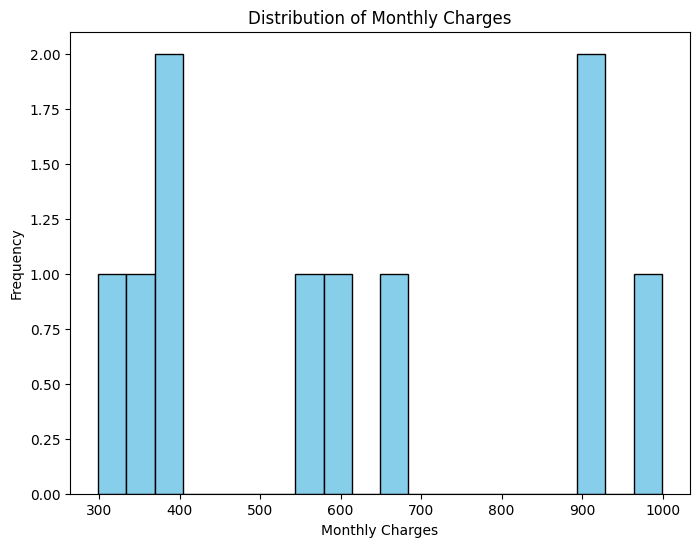

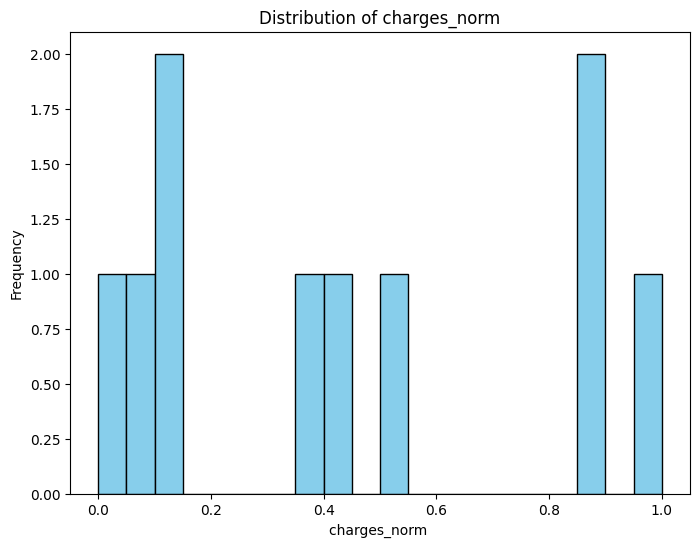

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(x=df[['monthly_charges']], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(x=df[['charges_norm']], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('charges_norm ')
plt.ylabel('Frequency')
plt.title('Distribution of charges_norm')
plt.show()

4.8 Handling Dates and Time Features

In [ ]:
# Extract year, month, and weekday from last_call_time
df['call_year'] = df['last_call_time'].dt.year
df['call_month'] = df['last_call_time'].dt.month
df['call_weekday'] = df['last_call_time'].dt.day_name()

# Calculate days since first recharge
df['days_since_first_recharge'] = (pd.to_datetime("2025-01-20") - df['first_recharge_date']).dt.days
df[['customer_id','last_call_time','first_recharge_date','days_since_first_recharge']].head()


,customer_id,last_call_time,first_recharge_date,days_since_first_recharge
0,C001,2025-01-18 21:15:42,2024-12-20,31
1,C002,2025-01-17 18:22:30,2025-01-02,18
2,C003,2025-01-16 20:10:45,2024-11-25,56
3,C004,2025-01-15 09:12:15,2024-12-10,41
4,C005,2025-01-14 11:45:22,2024-12-30,21


4.9 Feature Engineering Example

In [ ]:
# Combine plan type and region into a composite feature
df['plan_region'] = df['plan_type'] + "_" + df['region']
df[['plan_type','region','plan_region']].head()


,plan_type,region,plan_region
0,Basic,North,Basic_North
1,Premium,West,Premium_West
2,Standard,South,Standard_South
3,Basic,East,Basic_East
4,Premium,Central,Premium_Central


# Feature Selection


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

#X = df.drop('Churn', axis=1)
#y = df['Churn']

# Encode label as numeric
df['churn_encoded'] = df['churn'].map({'Yes': 1, 'No': 0})
print(df['churn_encoded'])

# Select only numeric columns
X = df.select_dtypes(include=np.number).drop(columns=['churn_encoded'], errors='ignore')
y = df['churn_encoded']

# Fill missing values if any (important for MI computation)
X = X.fillna(0)



0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    1
Name: churn_encoded, dtype: int64


Mutual Information Scores:

                      Feature  MI_Score
0                  call_month  2.225635
1                   call_year  0.811151
2             call_drop_ratio  0.350516
3                 tenure_norm  0.318968
4     complaints_last_30_days  0.258889
5                total_scaled  0.240635
6               total_charges  0.218968
7               tenure_months  0.201349
8              monthly_scaled  0.105992
9               calls_dropped  0.017738
10            monthly_charges  0.000000
11              support_calls  0.000000
12   days_since_last_recharge  0.000000
13             region_encoded  0.000000
14               charges_norm  0.000000
15  days_since_first_recharge  0.000000


/tmp/ipython-input-2577025050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='MI_Score', y='Feature', palette='viridis')


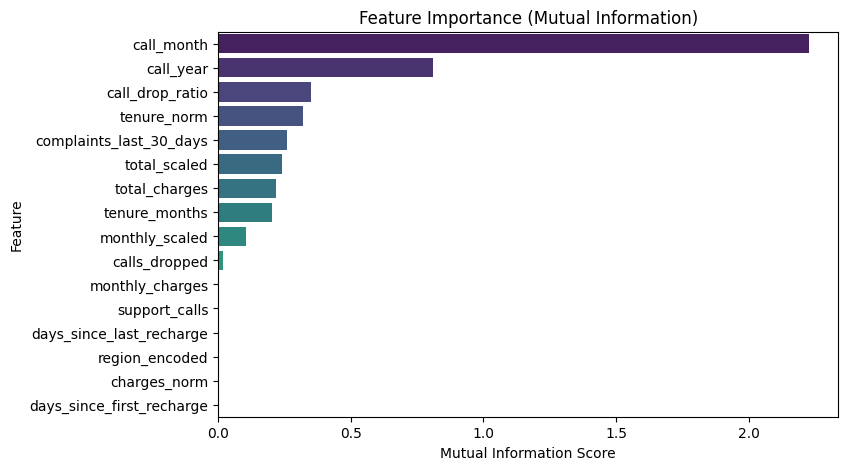

In [ ]:
# Mutual Information (Feature Importance)

mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)

importance = (
    pd.DataFrame({'Feature': X.columns, 'MI_Score': mi})
    .sort_values(by='MI_Score', ascending=False)
    .reset_index(drop=True)
)

print("Mutual Information Scores:\n")
print(importance)

# Plot Mutual Information Scores
plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='MI_Score', y='Feature', palette='viridis')
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()





Feature Correlations with Churn:

churn_encoded                1.000000
call_drop_ratio              0.851064
complaints_last_30_days      0.698535
calls_dropped                0.648394
days_since_last_recharge     0.474689
support_calls                0.339032
days_since_first_recharge    0.288425
region_encoded               0.144338
charges_norm                -0.399310
monthly_scaled              -0.399310
monthly_charges             -0.399310
tenure_months               -0.662965
tenure_norm                 -0.662965
total_charges               -0.698773
total_scaled                -0.698773
call_year                         NaN
call_month                        NaN
Name: churn_encoded, dtype: float64


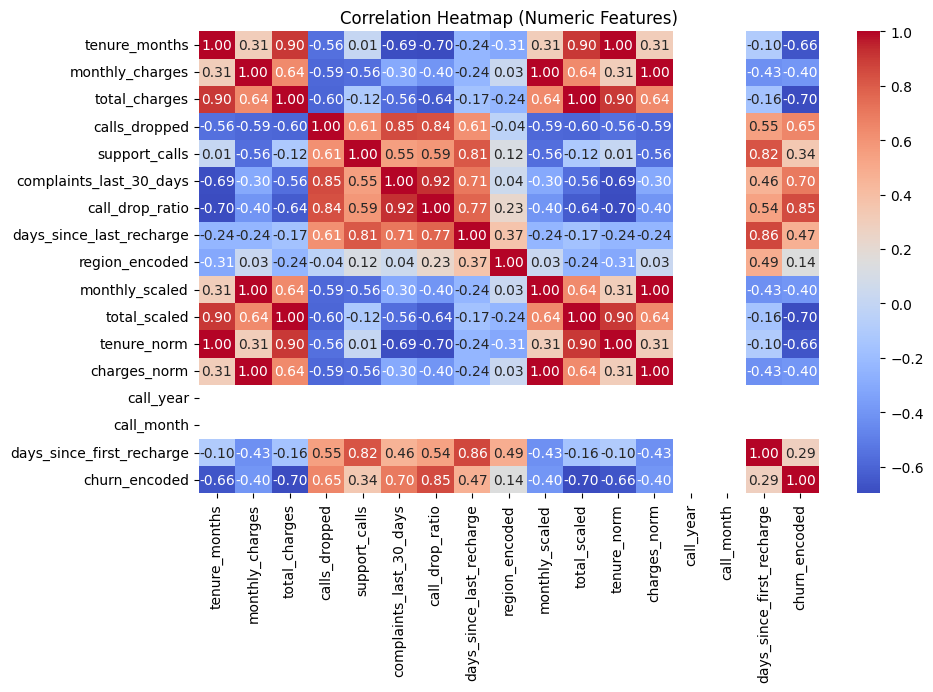

In [ ]:
# Correlation Analysis
corr = df.corr(numeric_only=True)

# Sort by correlation with churn
corr_sorted = corr['churn_encoded'].sort_values(ascending=False)

print("\nFeature Correlations with Churn:\n")
print(corr_sorted)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

4.12 Saving and Exporting Processed Data

In [ ]:
df.to_csv("telecom_processed.csv", index=False)
print("telecom_processed.csv saved successfully.")

telecom_processed.csv saved successfully.


### Key Takeaways

- **Feature** = Input variable for ML model  
- **Label** = Output or prediction target  
- **Encoding** makes categorical data numerical  
- **Scaling** ensures all numeric values lie on comparable scales  
- **Date handling** extracts time-based insights  
- **Feature selection** identifies which variables actually affect churn  
- **All examples** use one consistent dataset → `telecom_churn.csv`

---

# M2C6.1 Ravi's Invisible Bugs

In [ ]:
import pandas as pd
import numpy as np

# =========================
# Step 1: Base Original Dataset
# =========================
data = {
    "Customer_ID": ["001","001","001","002","002","002","003","003","003","004","004","005"],
    "Call_Timestamps": ["2025-08-01 10:15","2025-08-01 12:00","2025-08-01 22:32",
                        "2025-08-02 00:30","2025-08-03 12:30","2025-08-05 15:00",
                        "2025-08-01 09:00","2025-08-02 10:15","2025-08-04 20:30",
                        "2025-08-03 11:00","2025-08-08 18:00","2025-08-06 15:45"],
    "Data_Usage_MB": [500,1200,1500,700,635,550,2000,1800,2200,400,350,900],
    "Recharge_Amount": [199,0,0,299,199,0,399,0,199,149,0,299],
    "Plan_Type": ["Basic","Basic","Basic","Premium","Premium","Premium","Unlimited","Unlimited","Unlimited","Basic","Basic","Premium"],
    "Dropped_Calls": [2,1,3,0,2,1,1,0,2,3,2,0],
    "Complaint": ["Yes","Yes","Yes","No","Yes","No","No","No","Yes","Yes","No","No"]
}

df = pd.DataFrame(data)

# =========================
# Step 2: Inject Ravi's Invisible Bugs
# =========================

# Add signal_strength with ~18% NULLs
np.random.seed(42)
signal_strength = np.random.randint(1, 6, size=len(df)).astype(float)
null_indices = np.random.choice(df.index, size=int(0.18 * len(df)), replace=False)
signal_strength[null_indices] = np.nan
df["Signal_Strength"] = signal_strength

# Add Zone column (98% Urban, 2% Rural)
zones = ["Urban"] * (len(df)-1) + ["Rural"]
np.random.shuffle(zones)
df["Zone"] = zones

# Introduce outliers in Data_Usage_MB (>10 TB = 10,000,000 MB)
outlier_indices = np.random.choice(df.index, size=6, replace=False)
df.loc[outlier_indices, "Data_Usage_MB"] = df.loc[outlier_indices, "Data_Usage_MB"] * 1e6

# =========================
# Step 3: Validation Summary
# =========================
validation_summary = pd.DataFrame({
    "Check": [
        "Missing Signal_Strength",
        "Outliers (>10 TB)",
        "Rural Zone Representation"
    ],
    "Issue Found": [
        f"{df['Signal_Strength'].isna().mean()*100:.0f}% NULL values",
        f"{(df['Data_Usage_MB'] > 1e7).sum()} extreme outliers",
        f"{(df['Zone'] == 'Rural').mean()*100:.0f}% Rural samples"
    ]
})

# =========================
# Step 4: Display
# =========================
styled_raw = (
    df.style.hide(axis="index")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
        .set_caption("Telecom Dataset with Ravi's Invisible Bug")
)
display(styled_raw)

styled_validation = (
    validation_summary.style.hide(axis="index")
        .set_properties(**{"text-align": "center", "font-weight": "bold"})
        .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
        .set_caption("Validation Issues Detected by Arya")
)
display(styled_validation)

Customer_ID,Call_Timestamps,Data_Usage_MB,Recharge_Amount,Plan_Type,Dropped_Calls,Complaint,Signal_Strength,Zone
001,2025-08-01 10:15,500000000,199,Basic,2,Yes,4.000000,Urban
001,2025-08-01 12:00,1200000000,0,Basic,1,Yes,5.000000,Urban
001,2025-08-01 22:32,1500,0,Basic,3,Yes,nan,Urban
002,2025-08-02 00:30,700,299,Premium,0,No,5.000000,Urban
002,2025-08-03 12:30,635,199,Premium,2,Yes,5.000000,Urban
002,2025-08-05 15:00,550000000,0,Premium,1,No,2.000000,Urban
003,2025-08-01 09:00,2000,399,Unlimited,1,No,3.000000,Urban
003,2025-08-02 10:15,1800000000,0,Unlimited,0,No,3.000000,Urban
003,2025-08-04 20:30,2200,199,Unlimited,2,Yes,3.000000,Urban
004,2025-08-03 11:00,400000000,149,Basic,3,Yes,5.000000,Urban


Check,Issue Found
Missing Signal_Strength,17% NULL values
Outliers (>10 TB),6 extreme outliers
Rural Zone Representation,8% Rural samples
